In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

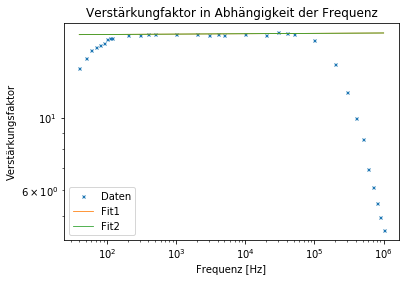

In [2]:
#frequency response
#ermitter circuit

#data

nu = np.array([40, 50, 60, 70, 80, 90, 100, 110, 120, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000])
nu_err= 0.00001*nu

#U_in = np.array([112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112, 112])
U_in_err = np.array([1.39, 1.49, 1.23, 1.36, 1.50, 1.43, 1.40, 1.34, 1.28, 1.51, 1.41, 1.15, 1.56, 1.20, 1.36, 1.57, 1.24, 1.28, 1.65, 1.35, 1.58, 1.21, 1.71, 1.17, 1.36, 1.20, 1.22, 1.41, 1.41, 1.66, 1.73, 1.28, 1.20])

U_out = np.array([1.59, 1.70, 1.80, 1.84, 1.87, 1.90, 1.95, 1.96, 1.96, 2.01, 2.01, 2.02, 2.02, 2.02, 2.02, 2.01, 2.02, 2.01, 2.02, 2.01, 2.04, 2.03, 2.02, 1.93, 1.63, 1.34, 1.12, 0.961, 0.779, 0.688, 0.615, 0.558, 0.508])
U_out_err = np.array([13.8, 13.9, 7.36, 10.4, 8.76, 12.2, 44.0, 10.7, 8.15, 9.45, 10.2, 7.63, 11.4, 9.77, 10.6, 9.80, 10.9, 10.4, 9.20, 10.6, 19.5, 16.9, 11.1, 10.9, 15.4, 11.5, 10.3, 10.7, 4.77, 4.76, 4.95, 5.70, 4.79])


V_U = U_out/(112*10**-3)
V_U_err = np.sqrt((U_out_err/112)**2+((U_in_err*10**-3)*U_out/(112*10**-3)**2)**2)

         
#plot
plt.figure('frqres')
plt.loglog(nu, V_U, linestyle='None', marker='x', markersize='3', label='Daten')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz')

#fit func to measured data 0:9
def fit_func1(nu, c, d):
    return c*np.log(nu)+d
p0= [1000 , 1000 , 5000 , 5 , 5]
popt, pcov = curve_fit(fit_func1, nu[0:9], V_U[0:9])


#fit func to measured data 10:22
def fit_func2(nu, a, b):
    return a*np.log(nu)+b
p0= [1000 , 1000 , 5000 , 5 , 5]
popt, pcov = curve_fit(fit_func2, nu[10:22], V_U[10:22])

#plot fit func
plt.loglog(nu, fit_func1(nu, *popt), linewidth=0.8, label='Fit1')
plt.loglog(nu, fit_func2(nu, *popt), linewidth=0.8, label='Fit2')
plt.xlabel('Frequenz [Hz]')
plt.ylabel('Verstärkungsfaktor')
plt.title(r'Verstärkungfaktor in Abhängigkeit der Frequenz')
plt.legend(loc='best')
plt.savefig(r'G:\Users\Thorben\Uni\GitHub\Universe\Praktikum\FP 1\E 01 - Elektronik Grundpraktikum/freqres.ermit.ET.pdf' ,format='PDF')
plt.show()